In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
films = pd.read_csv('movies.csv')

In [32]:
films.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [34]:
films = pd.merge(films, ratings, on='movieId')
films.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,890492517


In [35]:
films.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
From Here To Eternity: The Musical (2014)    5.0
Tainted Blood (1993)                         5.0
Look at Me (2012)                            5.0
My Christmas Prince (2017)                   5.0
You Must Be Joking (2014)                    5.0
Name: rating, dtype: float64

In [36]:
films.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: rating, dtype: int64

In [37]:
ratings = pd.DataFrame(films.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(films.groupby('title')['rating'].count())
ratings.head(5)

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


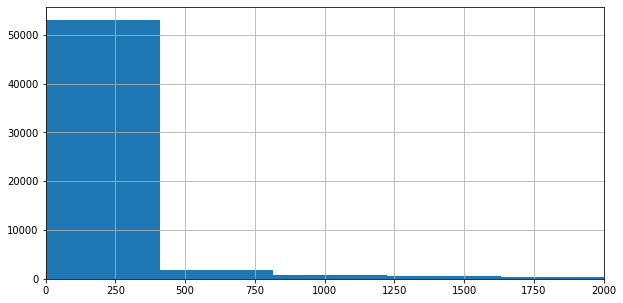

In [38]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000)
ratings['num of ratings'].hist(bins = 200)

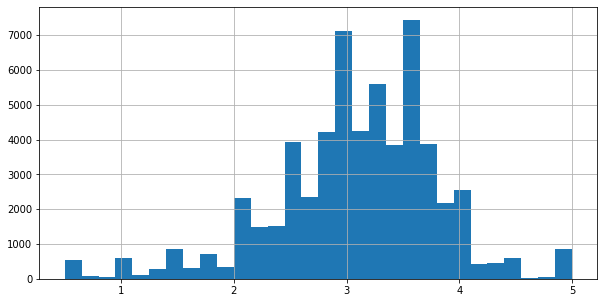

In [39]:
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=30)

In [40]:
mostRated = ratings[ratings['num of ratings']>100]

In [41]:
mostRated = mostRated.reset_index()

In [42]:
mostRated.head()

,title,rating,num of ratings
0,"""Great Performances"" Cats (1998)",2.896648,179
1,'71 (2014),3.680180,333
2,'Round Midnight (1986),3.648936,188
3,'Salem's Lot (2004),3.192547,161
4,'Til There Was You (1997),2.815789,475


In [43]:
df = pd.merge(mostRated, films, on='title')

In [44]:
df.head()

,title,rating_x,num of ratings,movieId,genres,userId,rating_y,timestamp
0,"""Great Performances"" Cats (1998)",2.896648,179,51372,Musical,1262,4.5,1314846144
1,"""Great Performances"" Cats (1998)",2.896648,179,51372,Musical,1282,4.5,1280854031
2,"""Great Performances"" Cats (1998)",2.896648,179,51372,Musical,1793,4.0,1365685560
3,"""Great Performances"" Cats (1998)",2.896648,179,51372,Musical,1833,3.0,1231042502
4,"""Great Performances"" Cats (1998)",2.896648,179,51372,Musical,2056,4.0,1356388704


In [45]:
rate4movie = df.pivot_table(index='userId', columns='title', values='rating_y')
rate4movie.head()

title,"""Great Performances"" Cats (1998)",'71 (2014),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),...,[REC]² (2009),[REC]³ 3 Génesis (2012),eXistenZ (1999),iBoy (2017),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: Return of Xander Cage (2017),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
forrestGump_ratings = rate4movie['Forrest Gump (1994)']

In [47]:
xxx_ratings = rate4movie['xXx (2002)']

In [48]:
forrestGump_ratings.head()

userId
1    NaN
2    4.5
3    4.0
4    NaN
5    4.0
Name: Forrest Gump (1994), dtype: float64

In [49]:
similar_to_forrstGump = rate4movie.corrwith(forrestGump_ratings)

In [50]:
similar_to_xxx = rate4movie.corrwith(xxx_ratings)

In [52]:
corr_forrestGump = pd.DataFrame(similar_to_forrstGump, columns=['Correlation'])
corr_forrestGump.dropna(inplace = True)
corr_forrestGump.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Forrest Gump (1994),1.000000
"Adventures of Huckleberry Finn, The (1960)",0.570004
Little Boy (2015),0.556562
Ghajini (2008),0.495038
Vacations in Prostokvashino (1980),0.489810
Tyler Perry's Madea's Family Reunion (2006),0.484658
One Good Cop (1991),0.475946
Only Old Men Are Going to Battle (V boy idut odni stariki) (1973),0.473969
Gentlemen of Fortune (Dzhentlmeny udachi) (1972),0.460839


In [55]:
corr_xxx = pd.DataFrame(similar_to_xxx, columns=['Correlation'])
corr_xxx.dropna(inplace = True)
corr_xxx.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Catwalk (1996),1.000000
xXx (2002),1.000000
August (1996),1.000000
"Sexual Life of the Belgians, The (Vie sexuelle des Belges 1950-1978, La) (1994)",0.989743
My Life and Times With Antonin Artaud (En compagnie d'Antonin Artaud) (1993),0.877454
"Last Klezmer: Leopold Kozlowski, His Life and Music, The (1994)",0.866025
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",0.843749
"Wooden Man's Bride, The (Yan shen) (1994)",0.829156
Métisse (Café au Lait) (1993),0.759374


In [56]:
corr_xxx = corr_xxx.join(ratings['num of ratings'])

In [57]:
corr_xxx.head()

,Correlation,num of ratings
title,,
"""Great Performances"" Cats (1998)",0.167461,179
'71 (2014),0.169989,333
'Round Midnight (1986),0.208015,188
'Salem's Lot (2004),0.424796,161
'Til There Was You (1997),0.052754,475


In [58]:
corr_xxx[corr_xxx['num of ratings'] > 300].sort_values('Correlation', ascending = False).head(10)

,Correlation,num of ratings
title,,
xXx (2002),1.000000,5956
xXx: Return of Xander Cage (2017),0.734036,398
xXx: State of the Union (2005),0.713628,1133
"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",0.704536,5169
"Fast & Furious (Fast and the Furious 4, The) (2009)",0.702883,2541
"Fast and the Furious, The (2001)",0.675904,9653
Journey 2: The Mysterious Island (2012),0.667536,404
"Fast & Furious 6 (Fast and the Furious 6, The) (2013)",0.663166,2118
This Means War (2012),0.662338,1283
